In [2]:
from py_core import Board, Evidence, zigzag_iterator, iterator, reverse_iterator
from random import choice, sample
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fn = iterator
e = Evidence(counter_move=True, trace_back_fn=fn)

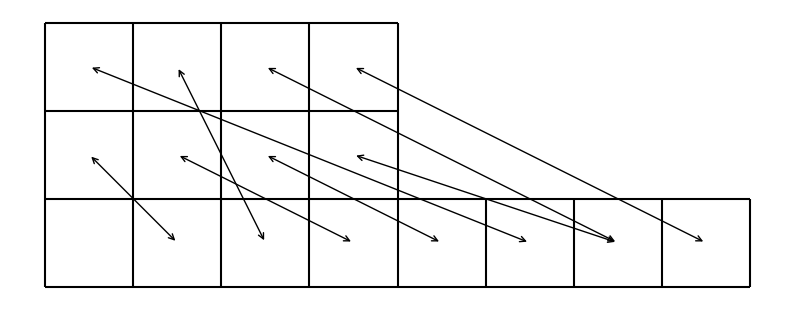

In [15]:
def draw_board(board):
    def draw(func, data):
        x = [i for i in range(len(data) + 1)]
        y = (data[0],) + data
        func(x, 0, y, colors='k')
    
    draw(plt.hlines, board.data)
    draw(plt.vlines, board.clone(False)._flip().data)

def draw_arrow(board):
    result = e.get(board)
    pairs = set()
    if not result:
        for move in fn(board):
            if move in pairs: continue
            new = board.chomp(*move, False)
            res = e.get(new)
            for option in res:
                pairs.add(tuple(sorted((move, option))))
        l = board.data[0] // 3
        for u, v in sorted(pairs):
            color = 'black'
            # if v[0] != 1: continue
            # if u[0] == 0: color='red'
            # elif v[0] > board[0] * 2 // 3: color='blue'
            # elif not( u[1] > board[0] // 3): color='green'
            u = u[0] + 0.5, u[1] + 0.5
            v = v[0] + 0.5, v[1] + 0.5
            ax.annotate("", xy=u, xytext=v,arrowprops=dict(arrowstyle="<->", color=color))
    else:
        for move in fn(board):
            new = board.chomp(*move, False)
            res = e.get(new)
            if res is False: continue
            for option in res:
                pairs.add((move, option))
        for u, v in pairs:
            color = 'black'
            u = u[0] + 0.5, u[1] + 0.5
            v = v[0] + 0.5, v[1] + 0.5
            ax.annotate("", xy=u, xytext=v,arrowprops=dict(arrowstyle="<-", color=color))

def draw_proof(board):
    draw_board(board)
    draw_arrow(board)

fig, ax = plt.subplots(figsize=(10, 10))

# x = 7
# b = Board.get_board(f"<({x*3},0),(2,1),(0,{x*2})>",False)
# b = b.chomp(20, 0, False).chomp(1, 12, False)
# print(b.as_ideal())
# draw_proof(b)
x = 1
# b = [7,7,4]
b = [10,6,4]
# b = [9,5,4] 
#b = [8,4,4]
draw_proof(Board(b))
# draw_proof(Board([7,4,3]))
# draw_proof(Board([5,5,3]))
# draw_proof(Board.get_board(f"<(8,0),(2,1),(1,9),(0,14)>", False))
# draw_proof(Board.get_board(f"<(11,0),(2,1),(1,9),(0,16)>",False))
# draw_proof(Board.get_board(f"<(17,0),(2,1),(1,10),(0,20)>",False))
# draw_proof(*Board.get_board(f"<({x*3-1},0),(2,1),(1,{2*x-2}),(0,{x*2})>").data)

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

In [ ]:
e.get(Board([5,4]))